In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

In [3]:
# data = constant_data.DataConstant

df1 =pd.read_excel("Womens Clothing Reviews Data _New.xlsx")
df1.head()
#df.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps..."
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...


In [4]:
from textblob import TextBlob
import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

In [5]:
df1['Merged_Review'] = df1['Merged_Review'].astype(str)
df1['sentiment'] = df1["Merged_Review"].apply(lambda x: TextBlob(x).sentiment.polarity ) 
### Now, we have sentiments using sentiment.polarity
#df['sentiment'] = df["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [6]:
df1.head()
#df

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.633333
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.339583
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.073209
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.560714
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.512891


In [7]:
# Divide the data in to positive, negative and neutral sentiments and add a column sentiment_category
df1['sentiment_cat'] = np.where(df1.sentiment>0.1,'Positive', np.where(df1.sentiment<0.1, 'Negative', 'Nuetral'))
#df['sentiment_cat'] = np.where(df.sentiment>0.1,'Positive', np.where(df1.sentiment<-0.1,'Negative', 'Nuetral'))

In [8]:
df1.head()
#df

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment,sentiment_cat
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.633333,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.339583,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.073209,Negative
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.560714,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.512891,Positive


In [9]:
# total positive, negative and neutral sentiments in sentiment_cat using .value_counts()
df1.sentiment_cat.value_counts()
#df.sentiment_cat.value_counts()

sentiment_cat
Positive    19200
Negative     3422
Nuetral        20
Name: count, dtype: int64

<Axes: xlabel='sentiment_cat'>

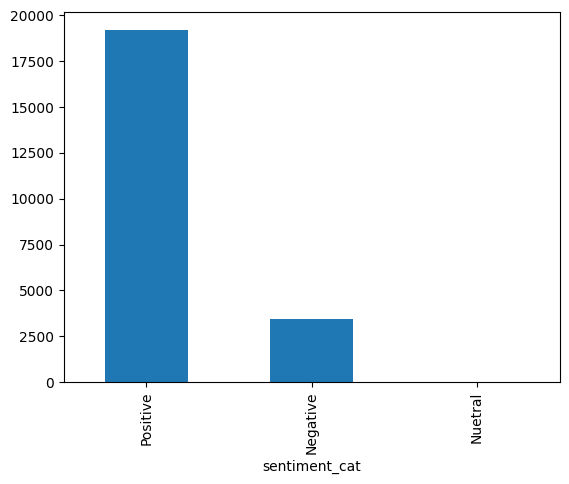

In [10]:
df1.sentiment_cat.value_counts().plot(kind='bar')

In [11]:
plt.savefig('Sentiment_plot')

<Figure size 640x480 with 0 Axes>

In [12]:
df1.Rating.value_counts()   ### Ratings 

Rating
5    12541
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

In [13]:
pd.crosstab(df1.sentiment_cat, df1.Rating)
#pd.crosstab(df.sentiment_cat, df.Rating)

Rating,1,2,3,4,5
sentiment_cat,,,,,
Negative,476,706,858,695,687
Nuetral,4,2,7,3,4
Positive,341,841,1958,4210,11850


Divide the data into three groups on the basis of sentiments like positive, negative and neutral

In [14]:
df2_neg = df1[(df1.sentiment_cat=='Negative')]
df3_pos = df1[(df1.sentiment_cat=='Positive')]
df4_neu = df1[(df1.sentiment_cat=='Neutral')]

#df[((df.sentiment_cat=='Negative') & (df.Rating==5))]

Split the data into train & Test where y variable is Rating


In [15]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
## X-variable is Review_text and y-variable is Rating
# define X and y

X = df1.Merged_Review
y = df1.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16981,)
(5661,)
(16981,)
(5661,)


In [16]:
df1.shape

(22642, 12)

Split the data into train & Test for positive sentiments and negative sentiments


In [17]:
# create a new DataFrame that only contains the 5 Rating and 1-Rating reviews
#women_clothing = women_clothing[(women_clothing.Rating==5) | (women_clothing.Rating==1)]

# define X and y
X2 = df3_pos.Merged_Review
y2 = df3_pos.Rating

# split the new DataFrame into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(14400,)
(4800,)
(14400,)
(4800,)


In [18]:
# define X and y
X1 = df2_neg.Merged_Review
y1 = df2_neg.Rating

# split the new DataFrame into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(2566,)
(856,)
(2566,)
(856,)


In [19]:
df3_pos.shape

(19200, 12)

In [20]:
df2_neg.shape

(3422, 12)

Creating user defined functions for clean the text and pre-process the data


In [21]:
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer  

#Abbrevations and Words correction
def clean_text(Merged_Review):
    Merged_Review = Merged_Review.lower()
    Merged_Review = Merged_Review.strip()
    Merged_Review = re.sub(r' +', ' ', Merged_Review)
    Merged_Review = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", Merged_Review)
    Merged_Review = Merged_Review.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return(Merged_Review)

In [22]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

sw = list(set(nltk.corpus.stopwords.words('english')))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
stop = list(set(sw + ['the', 'me', 'how', 'what']))
print(stop)

['was', 'themselves', 'these', 'why', 'before', 'ourselves', "wouldn't", 's', "weren't", 'he', "mustn't", 'by', 'now', 'isn', "won't", 'i', 'into', 'hers', "she's", 'there', 'mightn', 'did', 'some', 'weren', 'this', 'for', "you'd", 'when', 'will', 'does', 'while', 'few', 'me', 'do', 'to', 'each', 't', 'his', 'were', 'against', 've', 'down', 'needn', 'most', 'are', 'myself', 'of', 'any', 'both', 'an', 'all', 'have', "didn't", 'wouldn', 'only', "needn't", "aren't", 'ma', 'nor', "it's", 'too', 'ain', 'our', 'itself', 'we', "hasn't", 'not', 'over', 'more', 'wasn', "that'll", 'but', 'm', "you'll", 'yours', 'above', 'with', 'about', "shan't", 'my', "don't", 'how', 'they', 'and', 'because', 'their', 'or', 'shouldn', 'if', 'won', 'which', 'yourself', 'don', 'again', 'd', 'between', 'no', 'a', 'having', 'am', "you're", 'been', 'those', 'shan', "shouldn't", 'as', "should've", 'the', 'hasn', 'that', 'is', 'through', 'once', 'what', 'should', 'has', 'can', 'who', 'herself', 'at', 'under', 'aren', 

In [25]:
import string
from textblob import Word

def pre_process(Merged_Review):
    Merged_Review = Merged_Review.str.replace('/','')                           #Replacing the / with none
    Merged_Review = Merged_Review.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    Merged_Review = Merged_Review.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(Merged_Review)

In [26]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

CLean the text and pre-process the data for positive sentiments


In [27]:
X2_train = X2_train.apply(lambda x: clean_text(x))
X2_test = X2_test.apply(lambda x: clean_text(x))

In [28]:
from nltk.stem.wordnet import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

X2_train=pre_process(X2_train)
X2_test=pre_process(X2_test)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leaps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
X2_train


14208    dont buy dress blue stained dress hot summer d...
16354    perfect jacket absolutely love jacket year old...
20812    stylish shed sweater beautiful stylish unfortu...
7874     price right tried whim store might look like m...
20595    cute dress online purchased dress online didnt...
                               ...                        
12931    run small top dress quite lovely person run sm...
20393    nice romper adorable got wear plane upcoming v...
6123     great casual sweater lovely detail im wearing ...
14364    fun twist versatile piece love blazer much bou...
288      dress stunning vibrant color flirty feel got s...
Name: Merged_Review, Length: 14400, dtype: object

CLean the text and pre-process the data for negative sentiments


In [30]:
X1_train = X1_train.apply(lambda x: clean_text(x))
X1_test = X1_test.apply(lambda x: clean_text(x))

In [31]:
X1_train=pre_process(X1_train)
X1_test=pre_process(X1_test)

In [32]:
X1_train

4230     way way long absolutely beautiful pant soft we...
1183     flattering ive eyeing top floral pattern final...
6834     lot like reservation tried jacket store l seem...
19143    itchy somewhat sensitive skin fabric awful add...
6938     giant arm hole would kept dress werent giant a...
                               ...                        
18358    gorgeous approachable sweater instantly become...
5987     armhole huge material dress gorgeous armhole d...
7329     size usually wear pilcro size large waist grea...
1565     fun true size unlike reviewer found pant run t...
7073     surprise id hoped would cozy warm fabric thin ...
Name: Merged_Review, Length: 2566, dtype: object

Vectorization (Count, Tfidf) for positive sentiments


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
#Train
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain2_count = count_vect2.fit_transform(X2_train)

In [34]:
xtrain2_count


<14400x800 sparse matrix of type '<class 'numpy.int64'>'
	with 327278 stored elements in Compressed Sparse Row format>

Vectorization (Count, Tfidf) for negative sentiments


In [35]:
#Train
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
xtrain1_count = count_vect1.fit_transform(X1_train)

View the document term metrics for positive sentiments


In [36]:
dtm=xtrain2_count.toarray()

In [37]:
feature_names = count_vect2.get_feature_names_out()
print(feature_names)

['able' 'absolutely' 'across' 'actually' 'add' 'added' 'addition'
 'adorable' 'adore' 'ag' 'ago' 'agree' 'airy' 'aline' 'almost' 'along'
 'already' 'also' 'although' 'always' 'amazing' 'amount' 'anighthing'
 'ankle' 'another' 'anyone' 'anyway' 'appears' 'appropriate' 'area'
 'arent' 'arm' 'armhole' 'around' 'arrived' 'athletic' 'attractive'
 'available' 'average' 'away' 'awesome' 'awkward' 'b' 'baby' 'back' 'bad'
 'bag' 'baggy' 'band' 'barely' 'based' 'basic' 'bc' 'beach' 'beading'
 'beautiful' 'beautifully' 'beauty' 'believe' 'belly' 'belt' 'best'
 'better' 'big' 'bigger' 'billowy' 'bit' 'black' 'blazer' 'blouse' 'blue'
 'bodice' 'body' 'boot' 'booty' 'bottom' 'bought' 'boxy' 'bra' 'brand'
 'bright' 'broad' 'brown' 'build' 'bulky' 'bust' 'busty' 'butt' 'button'
 'buy' 'buying' 'c' 'came' 'cami' 'camisole' 'cannot' 'cant' 'cardigan'
 'care' 'case' 'casual' 'caught' 'chance' 'cheap' 'chest' 'chested' 'chic'
 'classic' 'classy' 'clean' 'clingy' 'close' 'closet' 'clothes' 'clothing'
 'coa

In [38]:
dtm1=pd.DataFrame(dtm, columns = count_vect2.get_feature_names_out())
dtm1

,able,absolutely,across,actually,add,added,addition,adorable,adore,ag,...,xl,xx,year,yellow,yes,yesterday,yet,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14396,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dtm1.apply(sum)

able          291
absolutely    572
across        217
actually      444
add           410
             ... 
yesterday      82
yet           410
youre         260
zip           102
zipper        232
Length: 800, dtype: int64

View the document term metrics for negative sentiments


In [40]:
dtm4=xtrain1_count.toarray()
print(count_vect1.get_feature_names_out())


['able' 'absolutely' 'across' 'actually' 'add' 'addition' 'adorable'
 'afraid' 'agree' 'almost' 'along' 'already' 'also' 'although' 'always'
 'amazing' 'amount' 'anighthing' 'ankle' 'another' 'anyone' 'anyway'
 'apart' 'appear' 'appears' 'area' 'arent' 'arm' 'armhole' 'armpit'
 'around' 'arrived' 'athletic' 'attached' 'available' 'average' 'away'
 'awful' 'awkward' 'b' 'baby' 'back' 'bad' 'badly' 'bag' 'baggy' 'band'
 'barely' 'based' 'basic' 'bc' 'beautiful' 'beautifully' 'beauty' 'behind'
 'beige' 'believe' 'belt' 'better' 'beware' 'big' 'bigger' 'billowy' 'bit'
 'black' 'blazer' 'blouse' 'blue' 'bodice' 'body' 'boob' 'boot' 'booty'
 'boring' 'bother' 'bottom' 'bought' 'bow' 'boxy' 'bra' 'brand' 'breast'
 'broad' 'brown' 'build' 'bulky' 'bummer' 'bump' 'bust' 'busty' 'butt'
 'button' 'buy' 'buying' 'c' 'came' 'cami' 'camisole' 'cannot' 'cant'
 'cardigan' 'care' 'case' 'casual' 'center' 'cheap' 'chest' 'chic' 'chose'
 'classic' 'clean' 'clingy' 'close' 'clothes' 'clothing' 'coat' 'col

In [41]:
dtm5=pd.DataFrame(dtm4, columns = count_vect1.get_feature_names_out())
dtm5

,able,absolutely,across,actually,add,addition,adorable,afraid,agree,almost,...,xsmall,xsp,xx,year,yellow,yes,yet,youre,zip,zipper
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2562,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dtm5.apply(sum)


able          29
absolutely    52
across        51
actually      89
add           47
              ..
yes           21
yet           50
youre         50
zip           40
zipper        86
Length: 800, dtype: int64

Word frequencies for positive sentiments


In [43]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(40), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

In [44]:
word_freq

,freq
also,1548
arm,844
around,680
absolutely,572
adorable,546
another,502
almost,468
amazing,466
actually,444
area,422


In [45]:
word_freq_dictionary = dict(dtm1.apply(sum))


<Axes: >

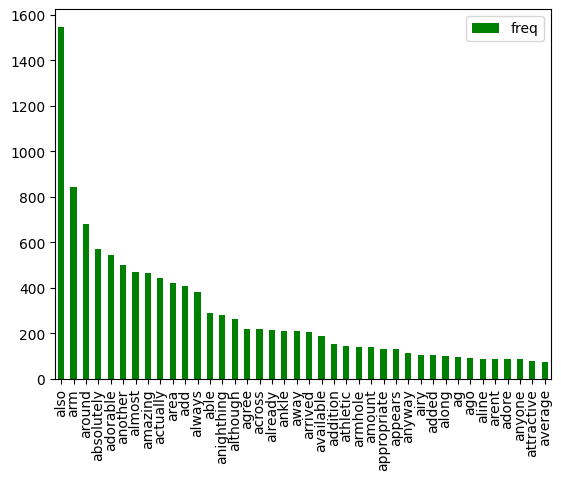

In [46]:
word_freq.plot(kind='bar', color='Green')


Word frequencies for negative sentiments


In [47]:
word_freq1 = pd.DataFrame(dtm5.apply(sum).head(40), columns=['freq'])
word_freq1.sort_values('freq', ascending=False, inplace=True)

In [48]:
word_freq_dictionary1 = dict(dtm5.apply(sum))

In [49]:
word_freq_dictionary1

{'able': 29,
 'absolutely': 52,
 'across': 51,
 'actually': 89,
 'add': 47,
 'addition': 18,
 'adorable': 51,
 'afraid': 27,
 'agree': 55,
 'almost': 92,
 'along': 23,
 'already': 61,
 'also': 383,
 'although': 51,
 'always': 60,
 'amazing': 23,
 'amount': 20,
 'anighthing': 46,
 'ankle': 43,
 'another': 107,
 'anyone': 28,
 'anyway': 17,
 'apart': 29,
 'appear': 16,
 'appears': 26,
 'area': 99,
 'arent': 19,
 'arm': 285,
 'armhole': 55,
 'armpit': 23,
 'around': 165,
 'arrived': 68,
 'athletic': 29,
 'attached': 17,
 'available': 30,
 'average': 24,
 'away': 49,
 'awful': 62,
 'awkward': 71,
 'b': 47,
 'baby': 20,
 'back': 599,
 'bad': 172,
 'badly': 17,
 'bag': 39,
 'baggy': 44,
 'band': 34,
 'barely': 48,
 'based': 48,
 'basic': 30,
 'bc': 19,
 'beautiful': 176,
 'beautifully': 16,
 'beauty': 18,
 'behind': 24,
 'beige': 17,
 'believe': 21,
 'belt': 41,
 'better': 118,
 'beware': 27,
 'big': 386,
 'bigger': 41,
 'billowy': 16,
 'bit': 293,
 'black': 268,
 'blazer': 18,
 'blouse': 12

For making word_clouds for postive sentiments


In [50]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)

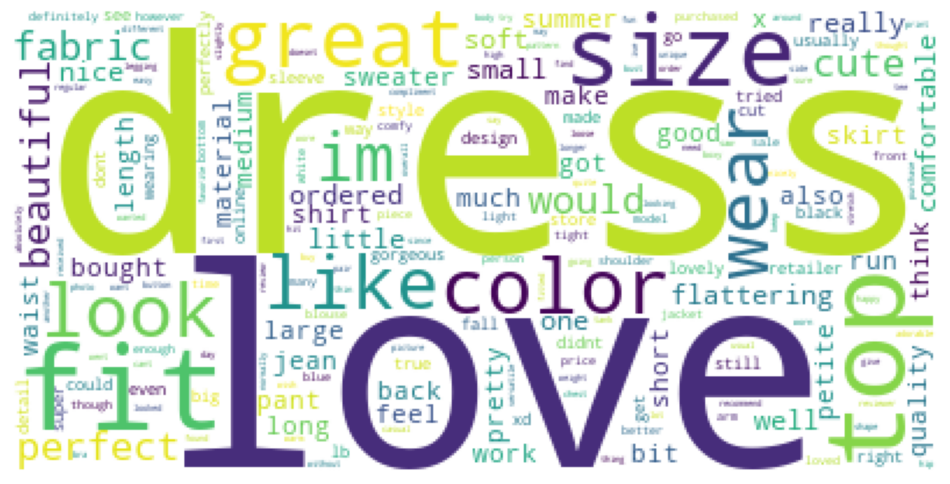

In [51]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [52]:
plt.savefig('positive_wordcloud')


<Figure size 640x480 with 0 Axes>

For making word_clouds for negative sentiments


In [53]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud1 = WordCloud(background_color='white', stopwords=stop)

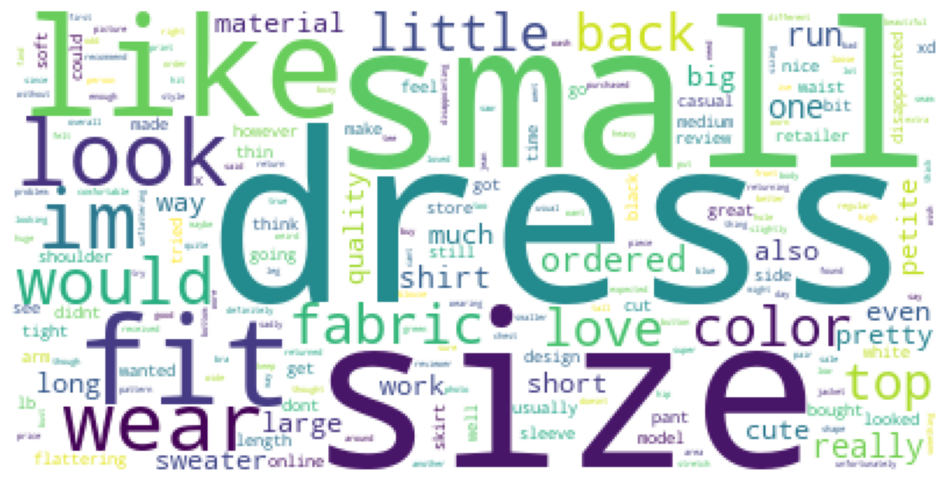

In [54]:
wordcloud1 = wordcloud1.generate_from_frequencies(word_freq_dictionary1)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud1)
plt.show()

In [55]:
plt.savefig('Negative_wordcloud')


<Figure size 640x480 with 0 Axes>

c. Understand sentiment among the customers on the different categories, sub categories,products by location and age group

In [56]:
df1['age_group'] = pd.cut(x= df1.Customer_Age,bins=[20, 29, 39, 49,59 ,69,79,89 ,99])


In [57]:
df1.head()


,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment,sentiment_cat,age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.633333,Positive,"(29, 39]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.339583,Positive,"(29, 39]"
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.073209,Negative,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.560714,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.512891,Positive,"(39, 49]"


In [58]:
df1.groupby(['Location', 'age_group','Category','SubCategory1','SubCategory2',"sentiment_cat" ]).agg({'sentiment_cat': 'count'})


sentiment_cat
Location  age_group Category  SubCategory1 SubCategory2   sentiment_cat               
Bangalore (20, 29]  General   Bottoms      Blouses        Negative                   0
                                                          Nuetral                    0
                                                          Positive                   0
                                           Casual bottoms Negative                   0
                                                          Nuetral                    0
...                                                                                ...
Mumbai    (89, 99]  Initmates Trend        Swim           Nuetral                    0
                                                          Positive                   0
                                           Trend          Negative                   0
                                                          Nuetral                    0
                                                          Positive                   0

[34560 rows x 1 columns]

In [59]:
df1.to_excel('Womens Clothing Reviews After Text Mining.xlsx', index=False)

d. Perform predictive analytics to understand the drivers of customers who are recommending the products.

Classification Model

Vectorization (count, tfidf) for both train & test


In [60]:
df1.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Rating,Recommend_Flag,Merged_Review,sentiment,sentiment_cat,age_group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,4,1,Absolutely wonderful - silky and sexy and com...,0.633333,Positive,"(29, 39]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,5,1,Love this dress! it's sooo pretty. i happen...,0.339583,Positive,"(29, 39]"
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flaws I had such high hopes ...,0.073209,Negative,"(59, 69]"
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy! I love, love, love this jumps...",0.560714,Positive,"(49, 59]"
4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirt This shirt is very flattering...,0.512891,Positive,"(39, 49]"


Split the data in X and Y ( Recommend_Flag)


In [61]:
## X-variable is Review_text and y-variable is Rating
# define X and y
X4 = df1.Merged_Review
y4 = df1.Recommend_Flag

# split the new DataFrame into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(16981,)
(5661,)
(16981,)
(5661,)


### Making a model using X_train (Review_text) data


In [62]:
X4_train = X4_train.apply(lambda x: clean_text(x))
X4_test = X4_test.apply(lambda x: clean_text(x))

In [63]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=100)
X_train_count4 = count_vect.fit_transform(X4_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=100)
X_train_tfidf4 = tfidf_vect.fit_transform(X4_train)

#Test
X_test_count4 = count_vect.transform(X4_test)
X_test_tfidf4 = tfidf_vect.transform(X4_test)

In [66]:
dtm_count=pd.DataFrame(X_train_count4.toarray(), columns=count_vect.get_feature_names())
dtm_tfidf=pd.DataFrame(X_train_tfidf4.toarray(), columns=tfidf_vect.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'